# Исследовательский анализ данных о качестве вина

В этом ноутбуке мы проведем анализ набора данных о качестве красного вина и исследуем взаимосвязи между химическими свойствами вина и его качеством.

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка визуализации
# Используем современный способ установки стиля для совместимости с новыми версиями
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('viridis')

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

## 1. Загрузка данных

In [2]:
# Загрузка данных
wine_data = pd.read_csv('../data/winequality-red.csv', sep=';')

# Просмотр первых строк данных
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Проверка размера набора данных
print(f"Размер набора данных: {wine_data.shape[0]} строк и {wine_data.shape[1]} столбцов")

Размер набора данных: 1599 строк и 12 столбцов


In [4]:
# Проверка типов данных и пропущенных значений
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Статистическое описание данных
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Анализ распределения качества вина

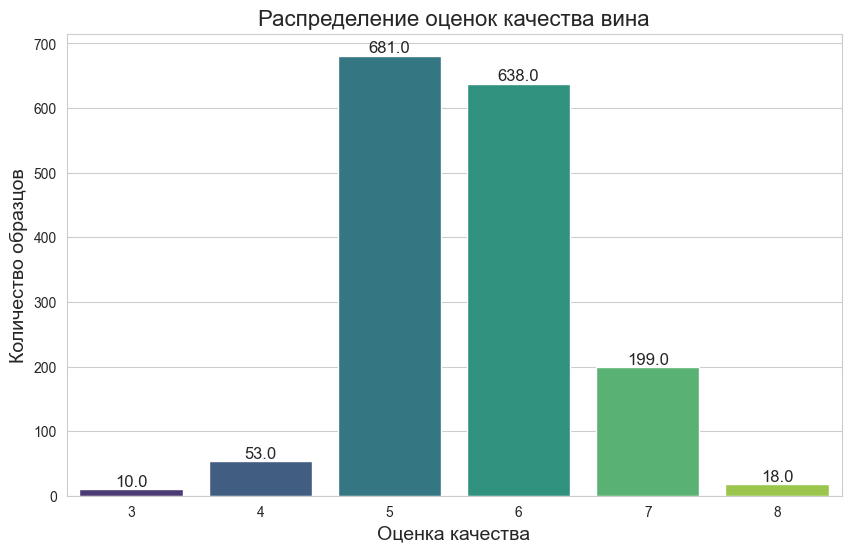

In [6]:
# Распределение оценок качества вина
plt.figure(figsize=(10, 6))
# Обновленный синтаксис для countplot в новых версиях seaborn
ax = sns.countplot(x=wine_data['quality'], palette='viridis')
plt.title('Распределение оценок качества вина', fontsize=16)
plt.xlabel('Оценка качества', fontsize=14)
plt.ylabel('Количество образцов', fontsize=14)

# Добавление подписей с количеством над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', fontsize=12)

plt.show()

In [7]:
# Процентное соотношение оценок качества
quality_counts = wine_data['quality'].value_counts(normalize=True) * 100
print("Процентное соотношение оценок качества:")
for quality, percentage in quality_counts.sort_index().items():
    print(f"Оценка {quality}: {percentage:.2f}%")

Процентное соотношение оценок качества:
Оценка 3: 0.63%
Оценка 4: 3.31%
Оценка 5: 42.59%
Оценка 6: 39.90%
Оценка 7: 12.45%
Оценка 8: 1.13%


## 3. Анализ корреляций между характеристиками вина

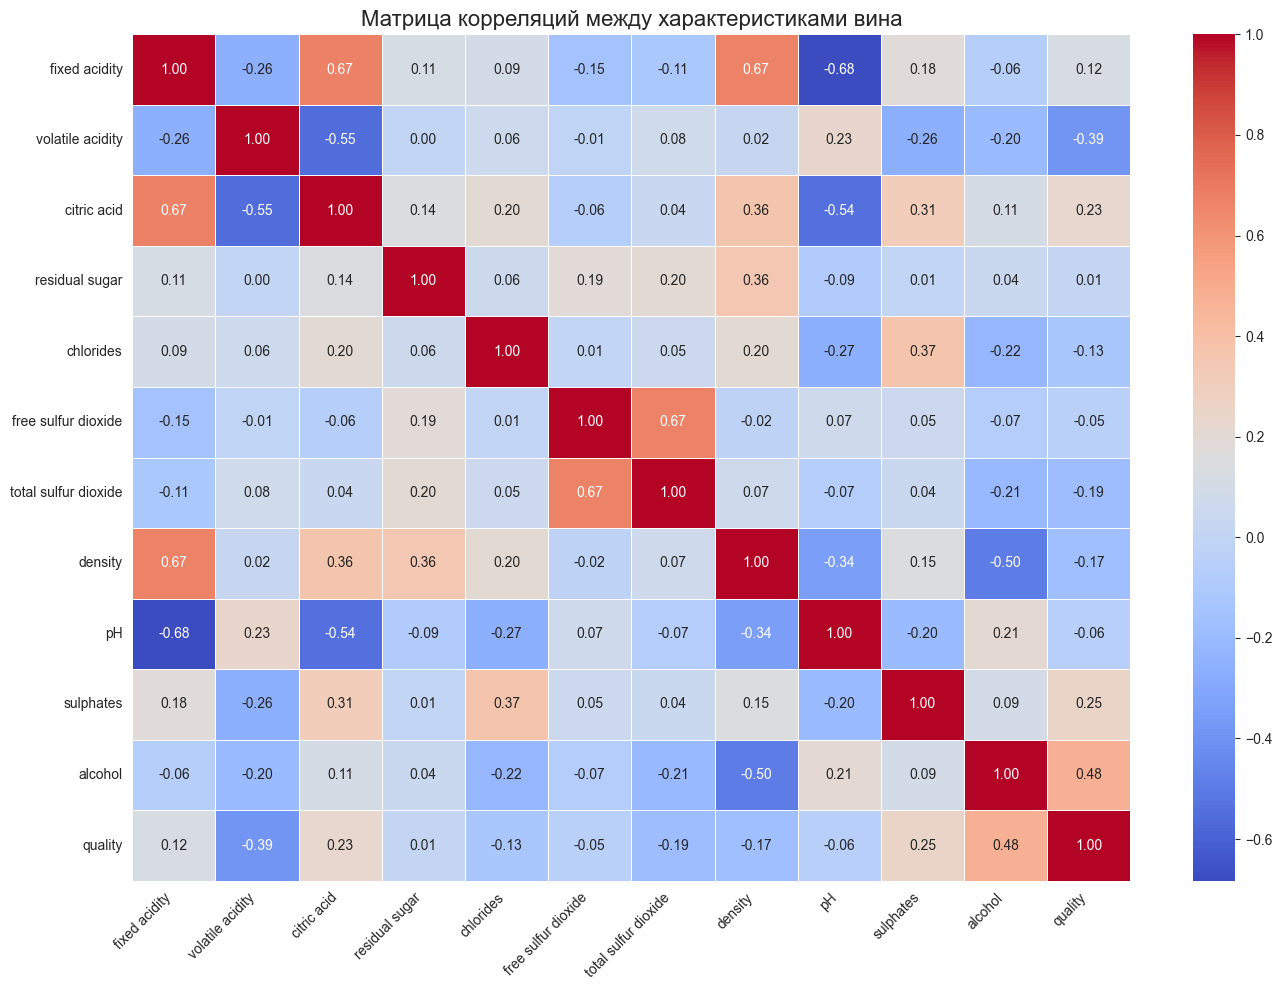

In [8]:
# Расчет матрицы корреляций
corr_matrix = wine_data.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций между характеристиками вина', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Выделение наиболее коррелированных с качеством характеристик
quality_correlations = corr_matrix['quality'].sort_values(ascending=False)
print("Корреляция характеристик с качеством вина:")
print(quality_correlations)

Корреляция характеристик с качеством вина:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


## 4. Визуализация взаимосвязей между характеристиками и качеством

In [10]:
# Функция для создания графика взаимосвязи между характеристикой и качеством
def plot_feature_vs_quality(feature):
    plt.figure(figsize=(12, 6))
    
    # Boxplot с обновленным синтаксисом
    plt.subplot(1, 2, 1)
    sns.boxplot(x=wine_data['quality'], y=wine_data[feature])
    plt.title(f'Boxplot: {feature} vs Quality', fontsize=14)
    plt.xlabel('Quality', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    
    # Violin plot с обновленным синтаксисом
    plt.subplot(1, 2, 2)
    sns.violinplot(x=wine_data['quality'], y=wine_data[feature], inner='quartile')
    plt.title(f'Violin Plot: {feature} vs Quality', fontsize=14)
    plt.xlabel('Quality', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    
    plt.tight_layout()
    plt.show()

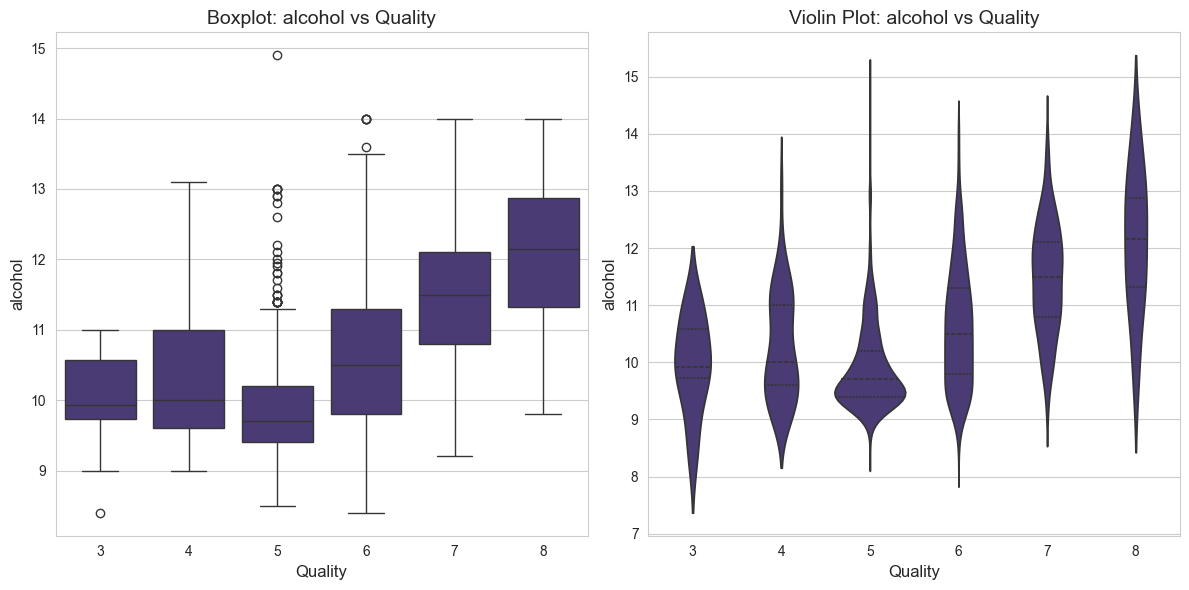

In [11]:
# Визуализация взаимосвязи между содержанием алкоголя и качеством
plot_feature_vs_quality('alcohol')

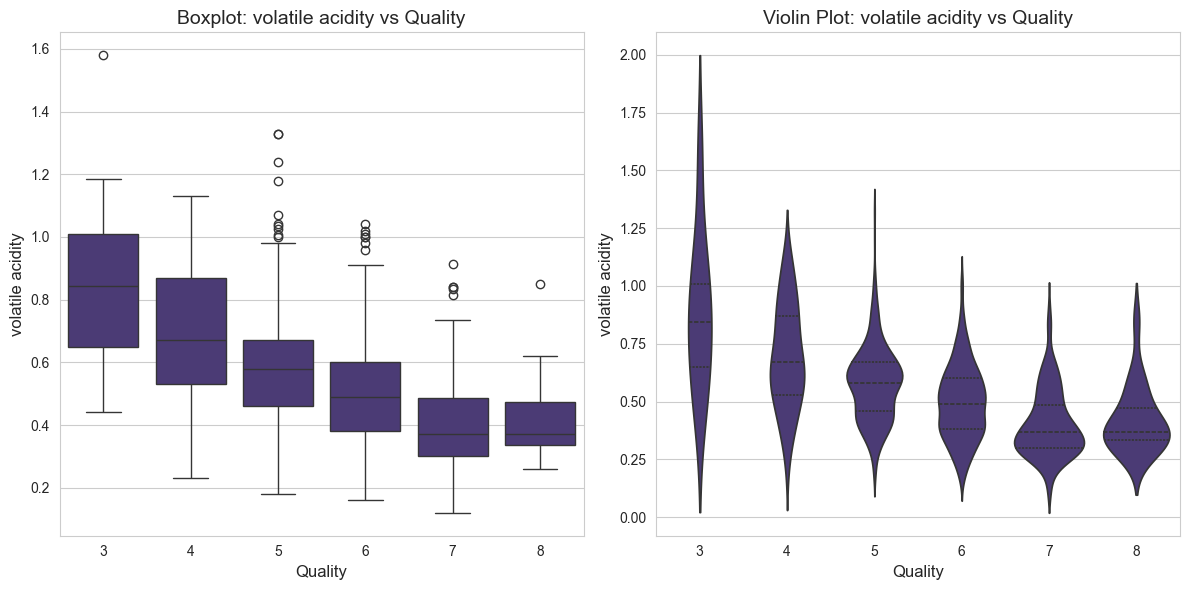

In [12]:
# Визуализация взаимосвязи между летучей кислотностью и качеством
plot_feature_vs_quality('volatile acidity')

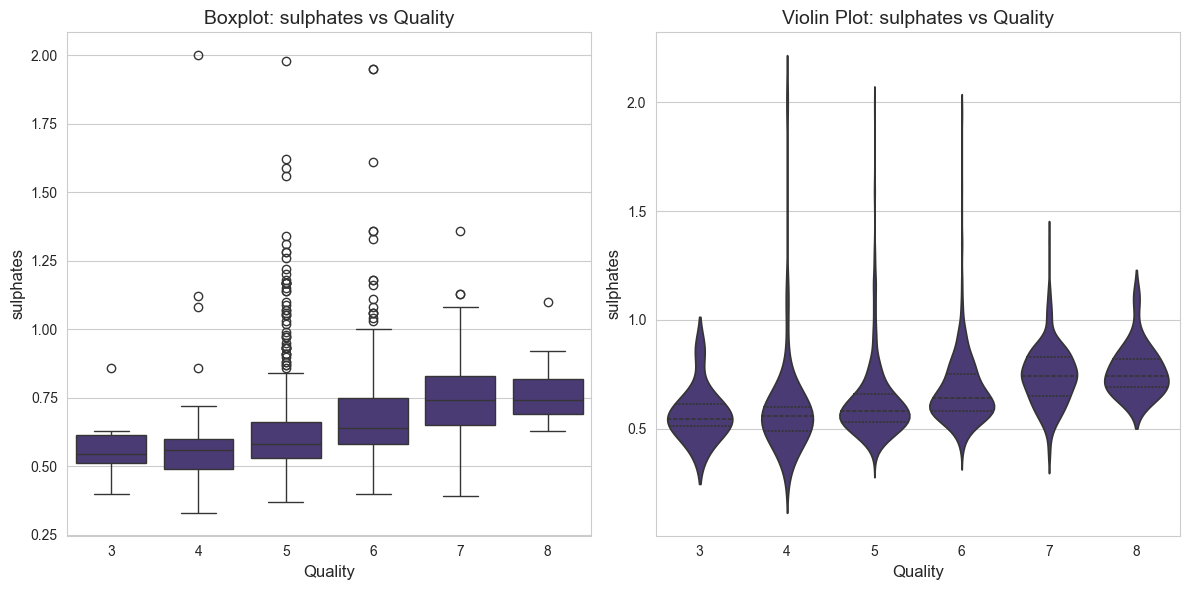

In [13]:
# Визуализация взаимосвязи между сульфатами и качеством
plot_feature_vs_quality('sulphates')

## 5. Распределения характеристик вина

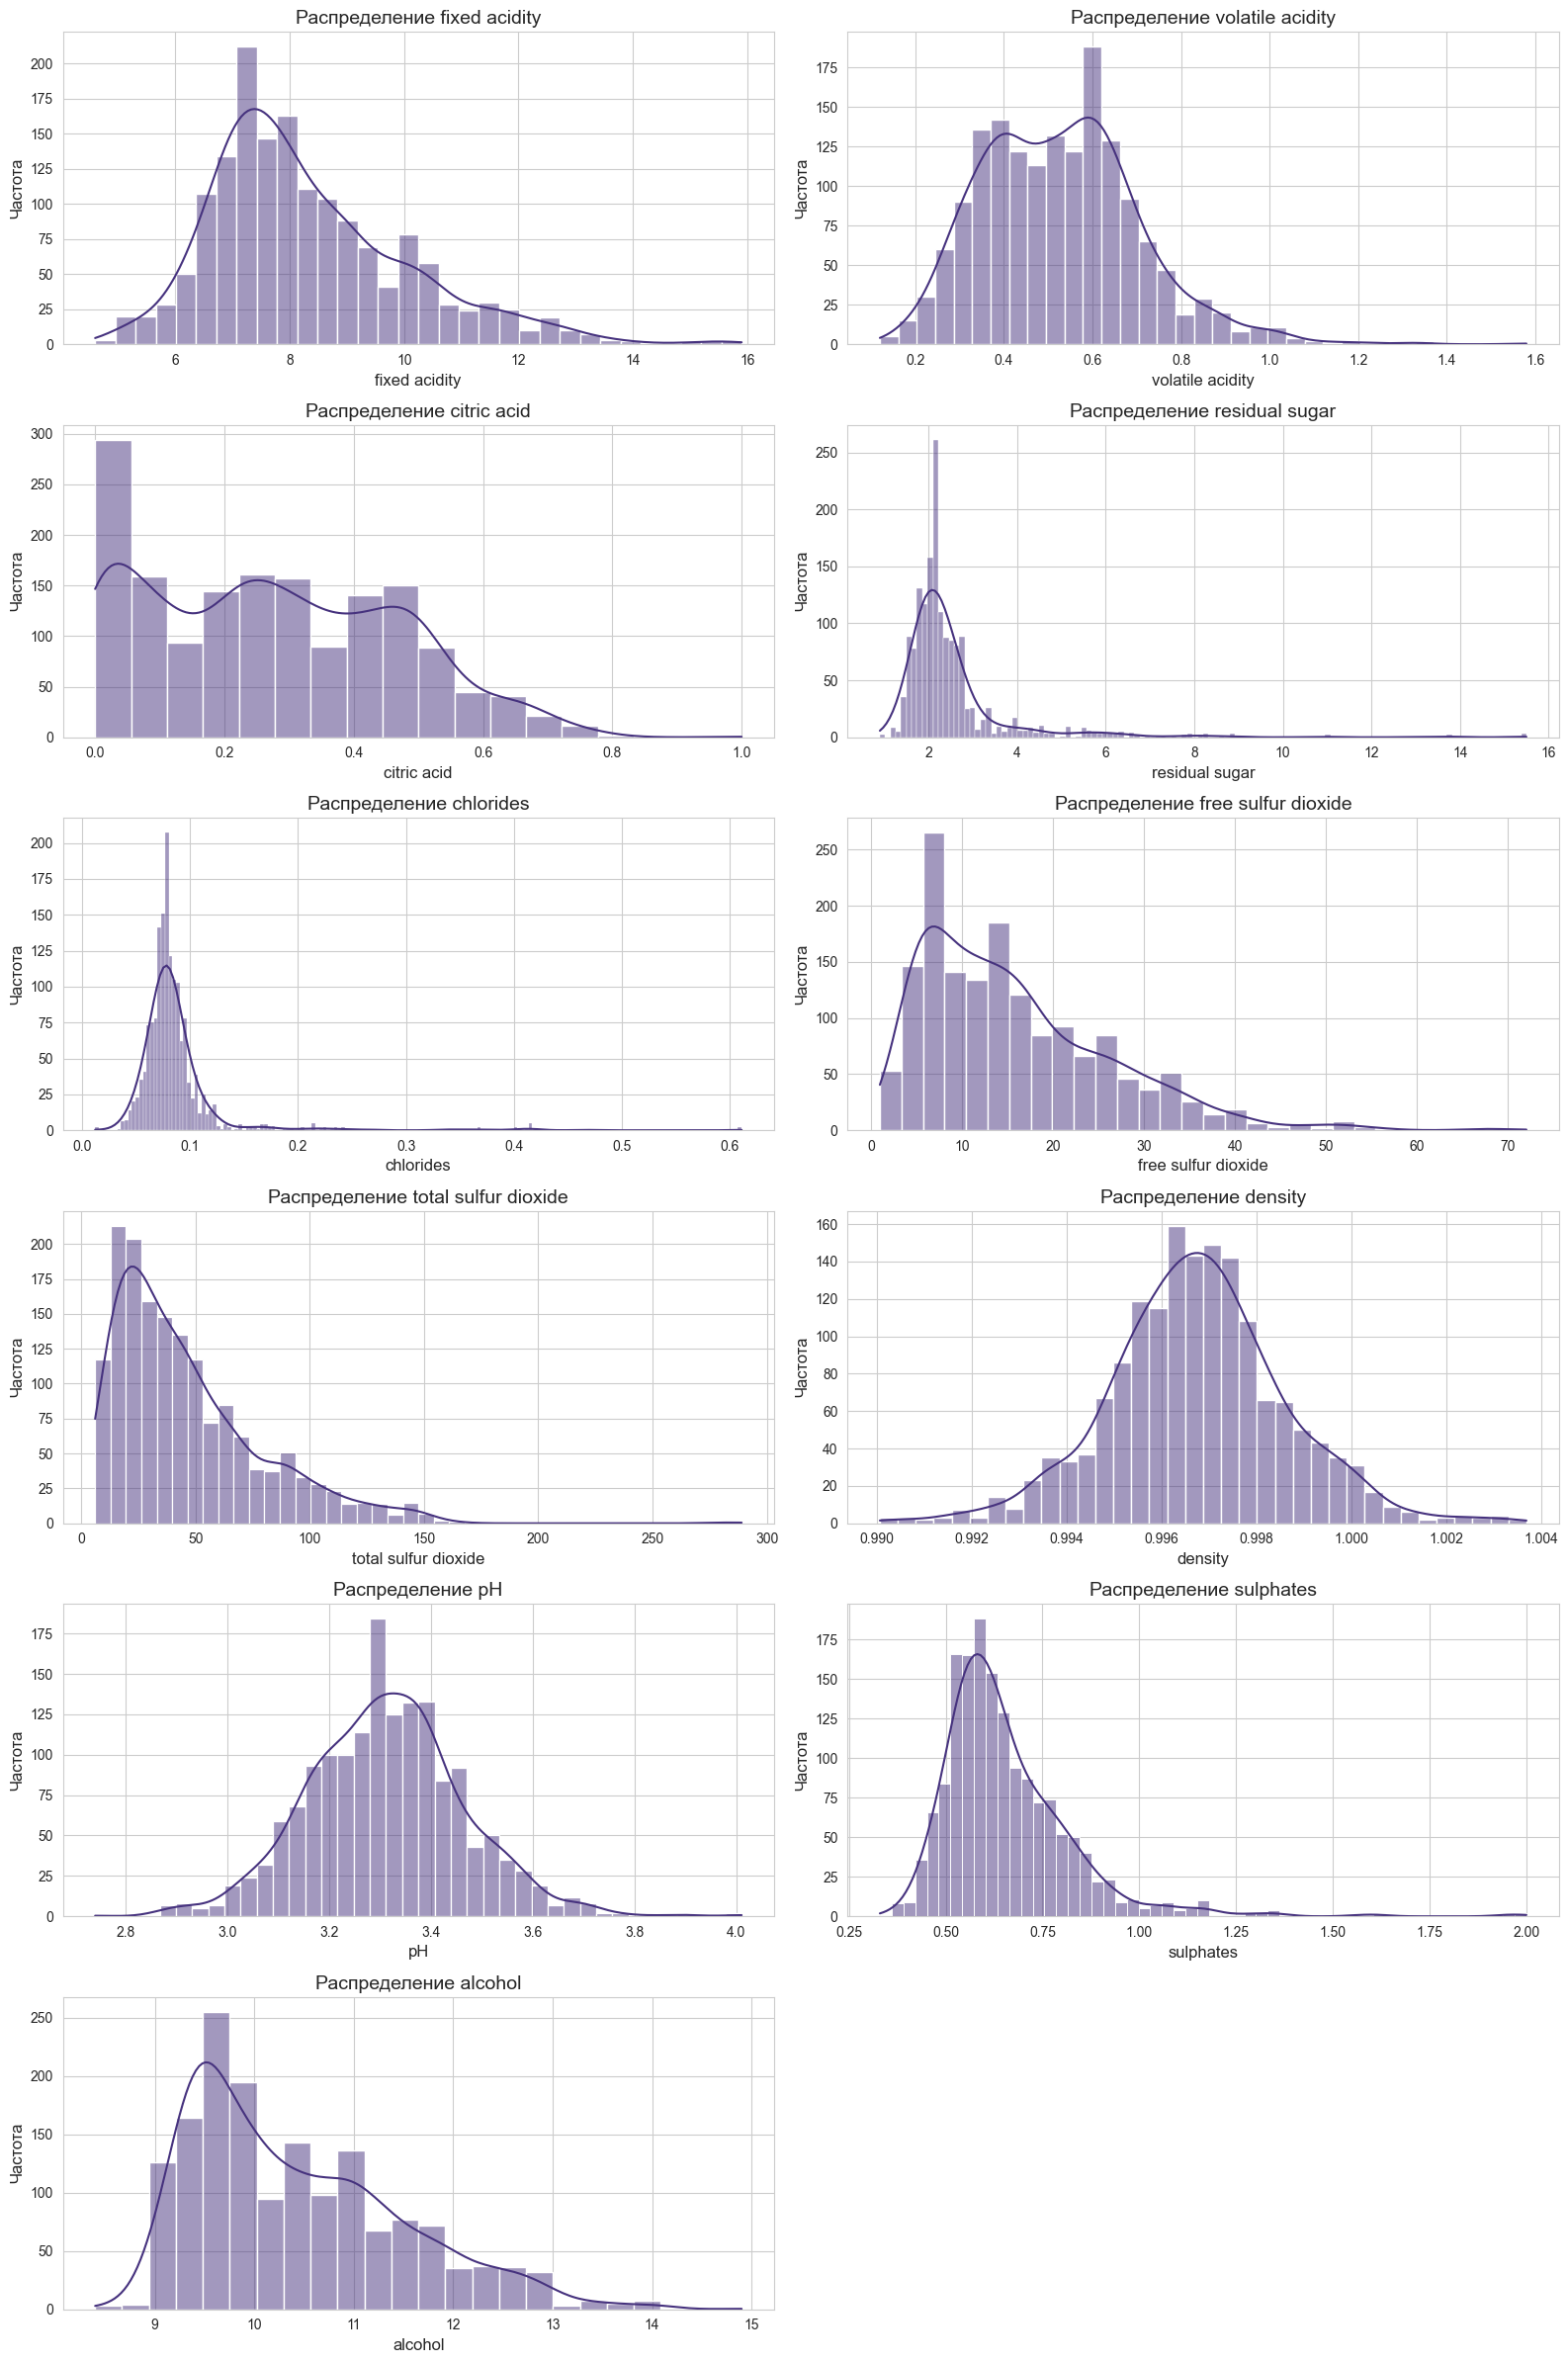

In [14]:
# Визуализация распределений всех характеристик
features = wine_data.columns.drop('quality')
n_features = len(features)
n_rows = (n_features + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    # Обновленный синтаксис histplot
    sns.histplot(data=wine_data, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Частота', fontsize=12)

# Скрыть пустые подграфики, если их количество нечетное
if n_features % 2 != 0:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

## 6. Парные графики для наиболее важных характеристик

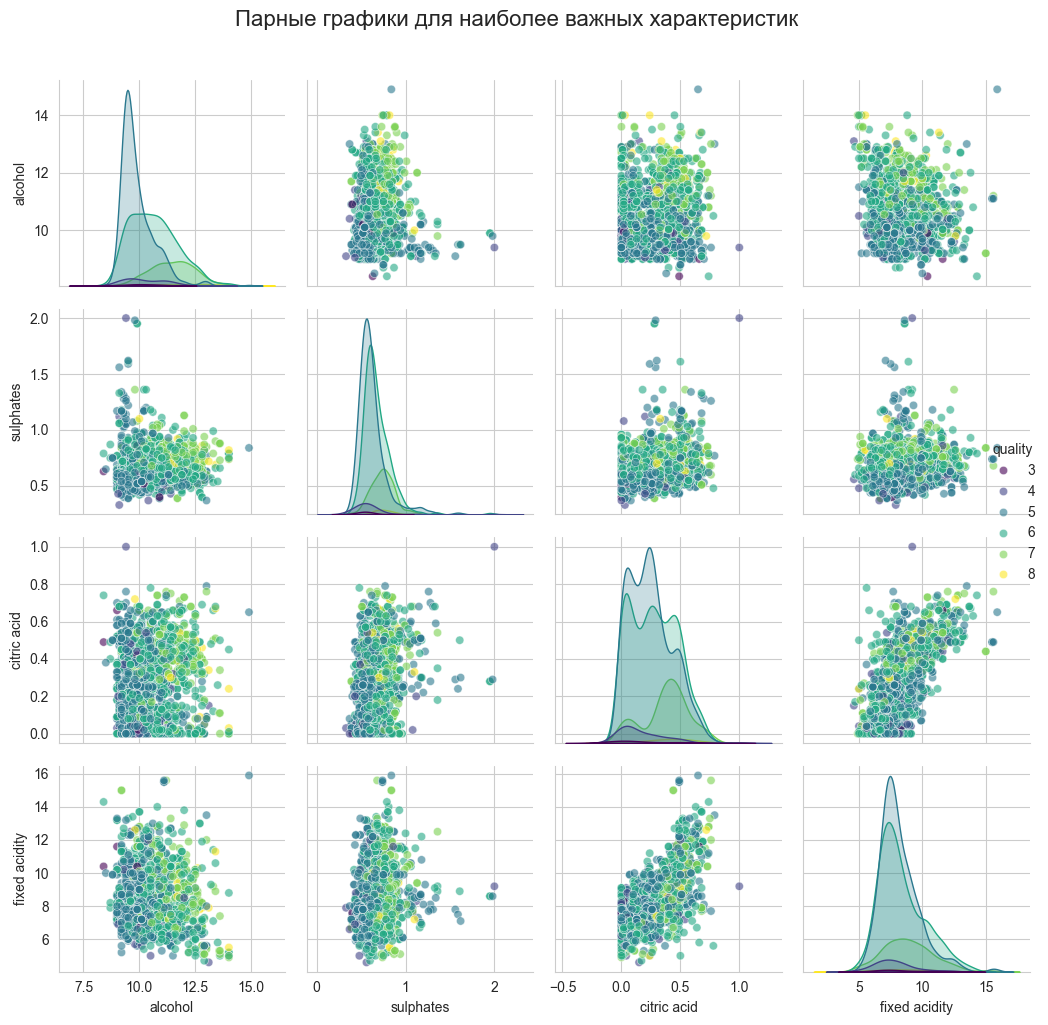

In [15]:
# Выбор наиболее важных характеристик на основе корреляции с качеством
top_features = quality_correlations.index[:5]  # Топ-5 характеристик
top_features = top_features.tolist()
if 'quality' in top_features:
    top_features.remove('quality')
top_features.append('quality')

# Создание парных графиков с обновленным синтаксисом
sns.pairplot(data=wine_data, vars=top_features[:-1], hue='quality', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Парные графики для наиболее важных характеристик', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## 7. Анализ выбросов

In [16]:
# Функция для обнаружения выбросов с использованием метода IQR
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [17]:
# Анализ выбросов для каждой характеристики
for feature in features:
    outliers, lower_bound, upper_bound = detect_outliers(wine_data, feature)
    outlier_percentage = len(outliers) / len(wine_data) * 100
    
    print(f"Характеристика: {feature}")
    print(f"Нижняя граница: {lower_bound:.2f}, Верхняя граница: {upper_bound:.2f}")
    print(f"Количество выбросов: {len(outliers)} ({outlier_percentage:.2f}%)")
    print("-" * 50)

Характеристика: fixed acidity
Нижняя граница: 3.95, Верхняя граница: 12.35
Количество выбросов: 49 (3.06%)
--------------------------------------------------
Характеристика: volatile acidity
Нижняя граница: 0.02, Верхняя граница: 1.02
Количество выбросов: 19 (1.19%)
--------------------------------------------------
Характеристика: citric acid
Нижняя граница: -0.40, Верхняя граница: 0.91
Количество выбросов: 1 (0.06%)
--------------------------------------------------
Характеристика: residual sugar
Нижняя граница: 0.85, Верхняя граница: 3.65
Количество выбросов: 155 (9.69%)
--------------------------------------------------
Характеристика: chlorides
Нижняя граница: 0.04, Верхняя граница: 0.12
Количество выбросов: 112 (7.00%)
--------------------------------------------------
Характеристика: free sulfur dioxide
Нижняя граница: -14.00, Верхняя граница: 42.00
Количество выбросов: 30 (1.88%)
--------------------------------------------------
Характеристика: total sulfur dioxide
Нижняя гран

## 8. Подготовка данных для моделирования

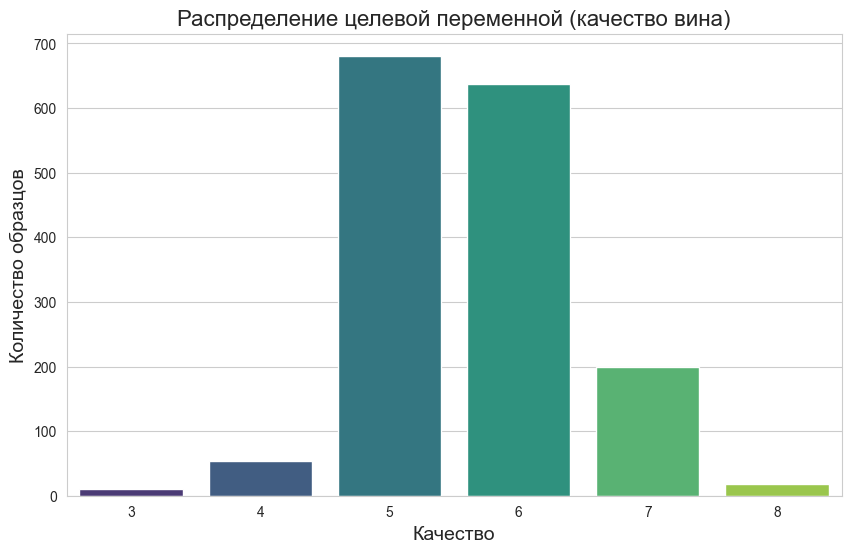

In [18]:
# Разделение данных на признаки и целевую переменную
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Проверка баланса классов с обновленным синтаксисом
plt.figure(figsize=(10, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Распределение целевой переменной (качество вина)', fontsize=16)
plt.xlabel('Качество', fontsize=14)
plt.ylabel('Количество образцов', fontsize=14)
plt.show()

## 9. Выводы

На основе проведенного исследовательского анализа данных можно сделать следующие выводы:

1. Набор данных содержит информацию о химических свойствах красного вина и его качестве.
2. Качество вина оценивается по шкале от 3 до 8, с преобладанием средних оценок (5 и 6).
3. Наиболее сильные корреляции с качеством вина имеют следующие характеристики:
   - Содержание алкоголя (положительная корреляция)
   - Летучая кислотность (отрицательная корреляция)
   - Содержание сульфатов (положительная корреляция)
4. В данных присутствуют выбросы, которые могут повлиять на качество модели.
5. Распределение целевой переменной несбалансировано, что необходимо учесть при моделировании.

Эти выводы будут использованы при построении модели для предсказания качества вина.